## Instalar Conjunto de bibliotecas necessárias

In [4]:
!pip install pandas numpy matplotlib seaborn scikit-learn

## Importar a biblioteca e a base de dados para após exibir os primeiros dados

In [6]:
import pandas as pd

# Carregar o CSV
df = pd.read_csv('C:/imports/titanic/titanic.csv')

# Exibir as primeiras linhas para verificar como os dados estão
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Resumo estatístico

In [8]:
# Exibir um resumo estatístico das variáveis numéricas
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Verificação para dados faltantes

In [10]:
# Verificar se há valores ausentes
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Distribuição das variáveis categóricas:

In [12]:
# Exibir as contagens das variáveis categóricas
df['Sex'].value_counts()  # Exemplo para sexo
df['Pclass'].value_counts()  # Exemplo para classe do bilhete (Pclass)


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

## Passo 4: Análise de Sobrevivência por Sexo

### Taxa de sobrevivência entre os sexos

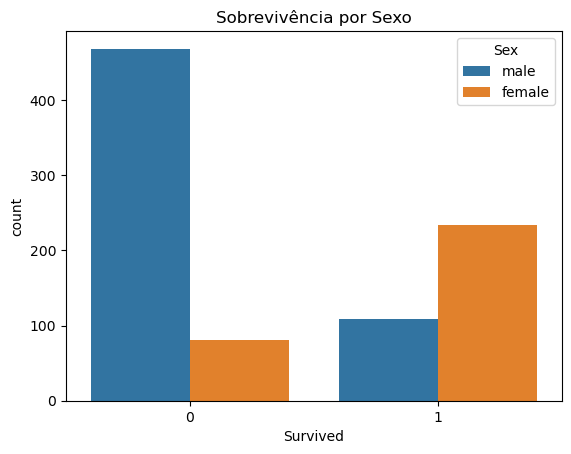

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar a sobrevivência por sexo
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Sobrevivência por Sexo')
plt.show()


## Análise da Idade

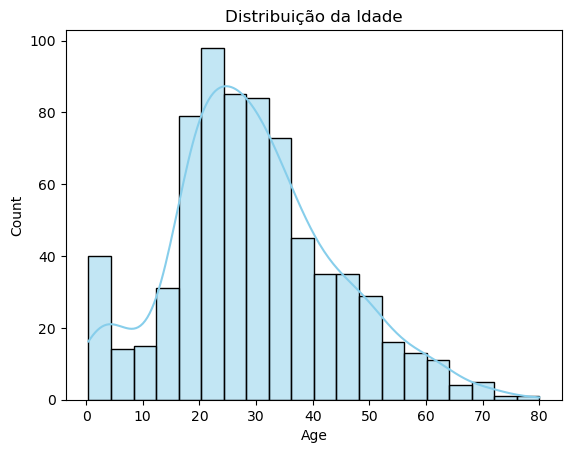

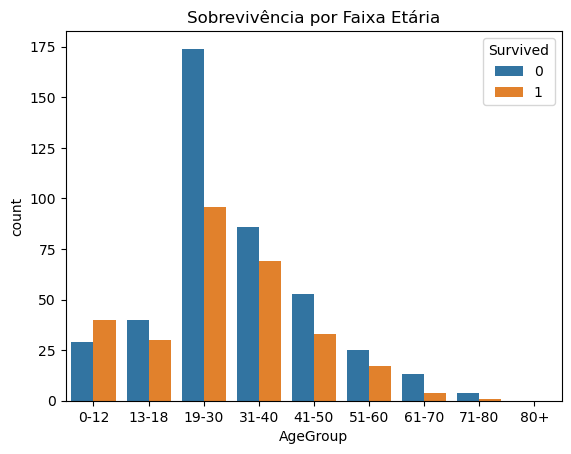

In [17]:
# Exibir a distribuição da idade
sns.histplot(df['Age'].dropna(), kde=True, color='skyblue')
plt.title('Distribuição da Idade')
plt.show()

# Ou você pode agrupar por faixas etárias
bins = [0, 12, 18, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-12', '13-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Verificar sobrevivência por faixa etária
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title('Sobrevivência por Faixa Etária')
plt.show()


## Análise de Classe de Passagem (Pclass)

### O Fator da classe da passagem pode ser um fator importante para a sobrevivência

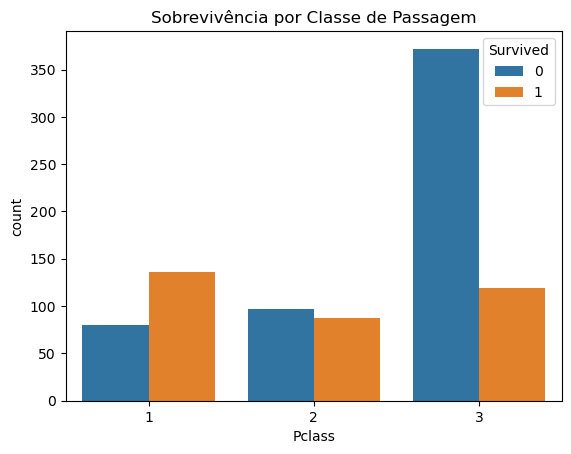

In [20]:
# Sobrevivência por classe de passagem
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Sobrevivência por Classe de Passagem')
plt.show()


## Análise de Familias (SibSp e Parch)

### Analisando o número de parentes a bordo (SibSp e Parch) impacta na sobrevivência

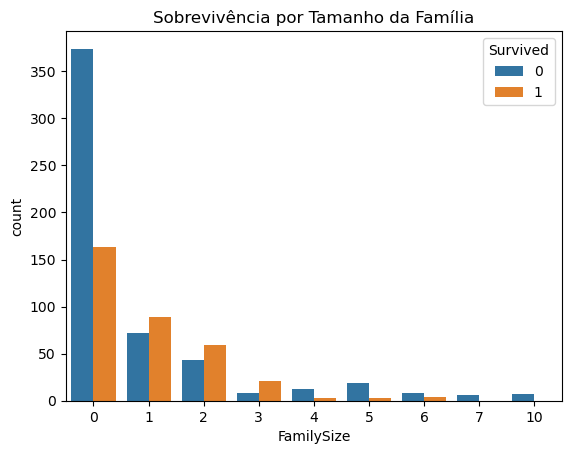

In [23]:
# Criar uma coluna com o número total de parentes a bordo
df['FamilySize'] = df['SibSp'] + df['Parch']

# Sobrevivência por tamanho da família
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Sobrevivência por Tamanho da Família')
plt.show()


### Análise das tarifas pagas pelos passageiros, pode ser um fator relevante

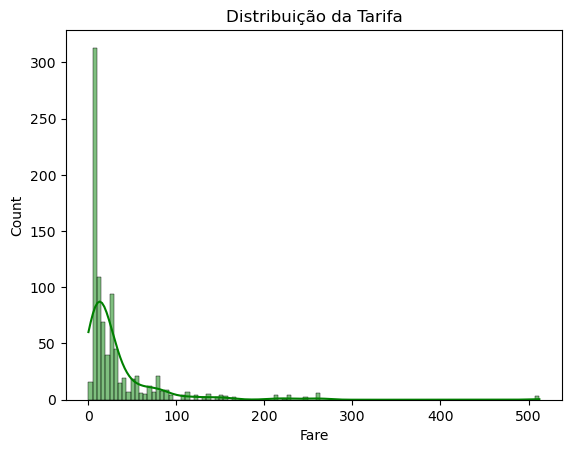

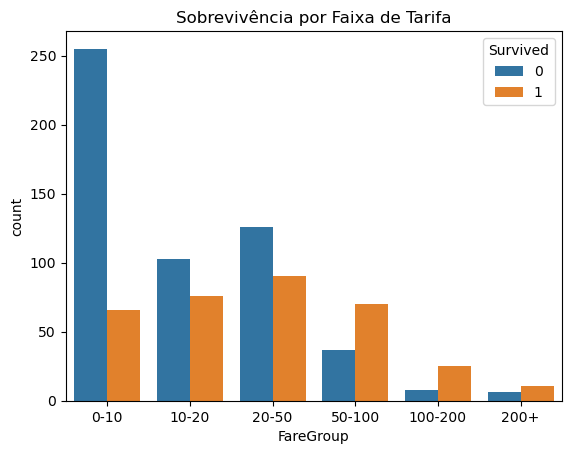

In [25]:
# Distribuição das tarifas
sns.histplot(df['Fare'], kde=True, color='green')
plt.title('Distribuição da Tarifa')
plt.show()

# Sobrevivência por faixa de tarifa
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 10, 20, 50, 100, 200, 500], labels=['0-10', '10-20', '20-50', '50-100', '100-200', '200+'])

sns.countplot(x='FareGroup', hue='Survived', data=df)
plt.title('Sobrevivência por Faixa de Tarifa')
plt.show()


## Modelo Preditivo (usando Regressão Logística)

### Criado um modelo simples de Machine Learning com "Regressão Logística" para prever a sobrevivência

#### Primeiro, vamos limpar os dados para preparar o modelo

In [29]:
# Preencher valores nulos (exemplo simples: usar a mediana para a idade)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Converter variáveis categóricas para numéricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']]
y = df['Survived']


#### Dividir em dados de treino e teste:

In [31]:
from sklearn.model_selection import train_test_split

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Preencher valores ausentes com a mediana ou média:

In [33]:
from sklearn.impute import SimpleImputer

# Imputar valores ausentes com a mediana (para dados numéricos)
imputer = SimpleImputer(strategy='median')

# Aplicar a imputação
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])   

#### Verificar se há mais valores ausentes

In [35]:
from sklearn.impute import SimpleImputer

# Imputar valores ausentes na coluna 'Embarked' com a moda (valor mais comum)
imputer_embarked = SimpleImputer(strategy='most_frequent')
X_train['Embarked'] = imputer_embarked.fit_transform(X_train[['Embarked']])
X_test['Embarked'] = imputer_embarked.transform(X_test[['Embarked']])

In [36]:
print(X_train.isnull().sum())

Pclass      0
Sex         0
Age         0
Fare        0
SibSp       0
Parch       0
Embarked    0
dtype: int64


#### Treinar o modelo:

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Treinar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print(f'Acurácia: {accuracy_score(y_test, y_pred)}')

# Exibir a matriz de confusão
print(confusion_matrix(y_test, y_pred))


Acurácia: 0.8100558659217877
[[90 15]
 [19 55]]


Ótimo! A sua acurácia ficou em torno de 81%, o que é um bom resultado, especialmente considerando que o Titanic é um problema relativamente simples

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Inicializando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazendo previsões
rf_y_pred = rf_model.predict(X_test)

# Avaliando a acurácia
print(f'Acurácia (Random Forest): {accuracy_score(y_test, rf_y_pred)}')

# Exibindo a matriz de confusão
print(confusion_matrix(y_test, rf_y_pred))


Acurácia (Random Forest): 0.8212290502793296
[[90 15]
 [17 57]]


O modelo Random Forest obteve uma acurácia de 82.12%.

#### Random Forest Classifier é ideal para classificação de dados e é eficaz quando você tem um grande número de features e deseja um modelo robusto e eficiente, que minimiza o risco de overfitting e pode lidar com dados complexos e não-lineares.

Acurácia (Random Forest - Melhor Hiperparâmetro): 0.8268156424581006


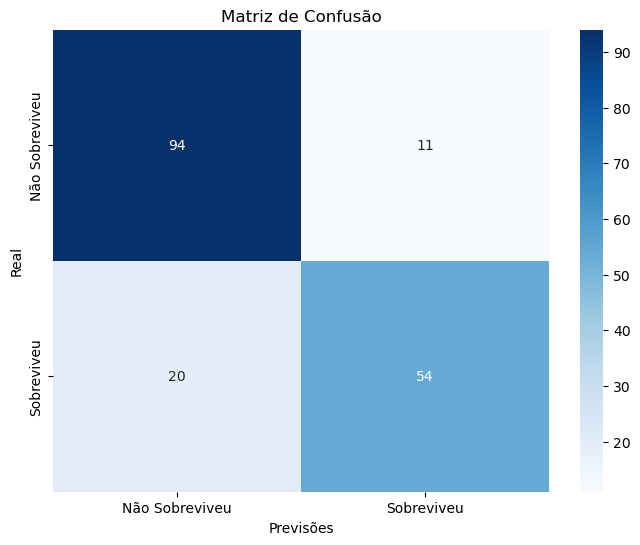

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializando o modelo Random Forest com os melhores parâmetros encontrados
best_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=5,
    max_features='sqrt',
    random_state=42
)

# Treinando o modelo
best_rf_model.fit(X_train, y_train)

# Fazendo previsões com o modelo treinado
rf_y_pred = best_rf_model.predict(X_test)

# Avaliando a acurácia
print(f'Acurácia (Random Forest - Melhor Hiperparâmetro): {accuracy_score(y_test, rf_y_pred)}')

# Exibindo a matriz de confusão
conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


A matriz de confusão é uma forma de avaliar como seu modelo está funcionando em cada categoria e é crucial para entender a eficácia do modelo, especialmente em problemas de classificação com mais de duas classes ou quando o desbalanceamento de classes é um problema.